# Building an Image Classifier Using the Sequential API

### Using Keras to load the dataset

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
tf.__version__

'2.2.0'

In [3]:
keras.__version__

'2.3.0-tf'

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [5]:
X_train_full.shape

(60000, 28, 28)

In [6]:
X_train_full.dtype

dtype('uint8')

### Split into a training set and test set, and scale the input features

In [7]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

### Labels

In [8]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [9]:
class_names[y_train[0]]

'Coat'

### Creating the model using the Sequential API

In [10]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax'),
])

### Summary of the model

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


### Layers information

In [12]:
model.layers

In [13]:
hidden1 = model.layers[1]

In [14]:
hidden1.name

'dense'

In [15]:
model.get_layer('dense') is hidden1

True

In [16]:
weights, biases = hidden1.get_weights()
weights

array([[-0.01009262, -0.00391889, -0.02914878, ...,  0.01352123,
         0.04749099,  0.02853217],
       [ 0.01067308,  0.07069631, -0.054462  , ..., -0.0392646 ,
        -0.04654817, -0.06295471],
       [ 0.01266043, -0.01810366,  0.03695272, ..., -0.03937062,
        -0.01537218, -0.02476561],
       ...,
       [-0.05862541,  0.02016501, -0.03522294, ...,  0.03699134,
        -0.01689089, -0.0060087 ],
       [-0.03605882, -0.0239052 , -0.04748067, ...,  0.00303221,
         0.05177179,  0.03254829],
       [ 0.0498861 ,  0.02001663, -0.02323835, ...,  0.04921468,
         0.04050671, -0.04543248]], dtype=float32)

In [17]:
weights.shape

(784, 300)

In [18]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [19]:
biases.shape

(300,)

### Compiling the model

In [20]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

### Training and evaluating the model

In [21]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.7167 - accuracy: 0.7649 - val_loss: 0.5319 - val_accuracy: 0.8170
Epoch 2/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.4916 - accuracy: 0.8301 - val_loss: 0.4488 - val_accuracy: 0.8432
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4450 - accuracy: 0.8437 - val_loss: 0.4345 - val_accuracy: 0.8466
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4193 - accuracy: 0.8538 - val_loss: 0.4065 - val_accuracy: 0.8642
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3977 - accuracy: 0.8613 - val_loss: 0.3880 - val_accuracy: 0.8640
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3811 - accuracy: 0.8665 - val_loss: 0.3722 - val_accuracy: 0.8698
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3690 - accuracy: 0.8696 - val_loss: 0.3803 - val_accuracy:

### History training

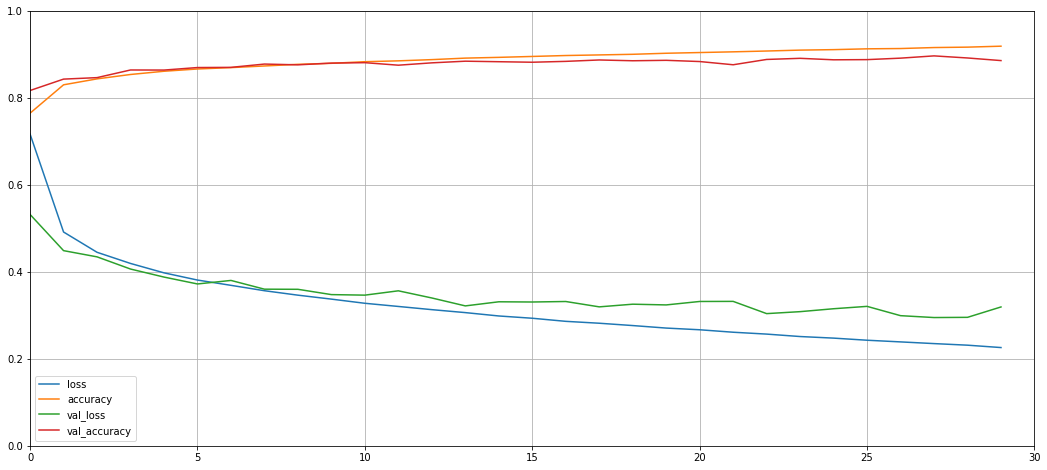

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(18, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.gca().set_xlim(0, 30)
plt.show()

### Evaluate model

In [23]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 742us/step - loss: 0.3505 - accuracy: 0.8776


[0.3505459129810333, 0.8776000142097473]

### Using the model to make predictions

In [24]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.05, 0.  , 0.95],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [25]:
import numpy as np

y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

array([9, 2, 1])

In [26]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

# Building a Regression MLP Using the Sequential API

### Preparing Data

In [27]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

### Buildding Sequential API

In [28]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(loss='mean_squared_error', optimizer='sgd')

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 0s 805us/step - loss: 0.9249 - val_loss: 0.5483
Epoch 2/20
363/363 [==============================] - 0s 699us/step - loss: 0.5321 - val_loss: 0.4778
Epoch 3/20
363/363 [==============================] - 0s 706us/step - loss: 0.4878 - val_loss: 0.4573
Epoch 4/20
363/363 [==============================] - 0s 707us/step - loss: 0.4669 - val_loss: 0.4639
Epoch 5/20
363/363 [==============================] - 0s 704us/step - loss: 0.4580 - val_loss: 0.4663
Epoch 6/20
363/363 [==============================] - 0s 698us/step - loss: 0.4565 - val_loss: 0.4310
Epoch 7/20
363/363 [==============================] - 0s 707us/step - loss: 0.4406 - val_loss: 0.4479
Epoch 8/20
363/363 [==============================] - 0s 703us/step - loss: 0.4349 - val_loss: 0.4202
Epoch 9/20
363/363 [==============================] - 0s 695us/step - loss: 0.4277 - val_loss: 0.4154
Epoch 10/20
363/363 [==============================] - 0s 715us/step - loss: 0.428

# Building Complex Models Using the Functional API

### Wide Deep neural network

In [29]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation='relu')(input_)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

model.compile(loss='mean_squared_error', optimizer='sgd')

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 0s 869us/step - loss: 0.9655 - val_loss: 0.6327
Epoch 2/20
363/363 [==============================] - 0s 760us/step - loss: 2.5597 - val_loss: 0.6586
Epoch 3/20
363/363 [==============================] - 0s 765us/step - loss: 6.1102 - val_loss: 0.5867
Epoch 4/20
363/363 [==============================] - 0s 759us/step - loss: 0.7763 - val_loss: 0.5074
Epoch 5/20
363/363 [==============================] - 0s 764us/step - loss: 3.0054 - val_loss: 0.5747
Epoch 6/20
363/363 [==============================] - 0s 768us/step - loss: 0.5803 - val_loss: 0.3956
Epoch 7/20
363/363 [==============================] - 0s 748us/step - loss: 0.4182 - val_loss: 0.3944
Epoch 8/20
363/363 [==============================] - 0s 738us/step - loss: 0.3942 - val_loss: 0.3737
Epoch 9/20
363/363 [==============================] - 0s 761us/step - loss: 0.3894 - val_loss: 0.3823
Epoch 10/20
363/363 [==============================] - 0s 752us/step - loss: 0.385

### Handling multiple inputs

In [30]:
input_A = keras.layers.Input(shape=[5], name='wide_input')
input_B = keras.layers.Input(shape=[6], name='deep_input')
hidden1 = keras.layers.Dense(30, activation='relu')(input_B)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name='output')(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20, validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 0s 909us/step - loss: 2.0096 - val_loss: 0.9723
Epoch 2/20
363/363 [==============================] - 0s 788us/step - loss: 0.8829 - val_loss: 0.7346
Epoch 3/20
363/363 [==============================] - 0s 793us/step - loss: 0.7330 - val_loss: 0.6534
Epoch 4/20
363/363 [==============================] - 0s 790us/step - loss: 0.6725 - val_loss: 0.6128
Epoch 5/20
363/363 [==============================] - 0s 788us/step - loss: 0.6379 - val_loss: 0.5877
Epoch 6/20
363/363 [==============================] - 0s 793us/step - loss: 0.6145 - val_loss: 0.5693
Epoch 7/20
363/363 [==============================] - 0s 806us/step - loss: 0.5965 - val_loss: 0.5564
Epoch 8/20
363/363 [==============================] - 0s 824us/step - loss: 0.5818 - val_loss: 0.5436
Epoch 9/20
363/363 [==============================] - 0s 799us/step - loss: 0.5693 - val_loss: 0.5337
Epoch 10/20
363/363 [==============================] - 0s 816us/step - loss: 0.558

### Handling multiple outputs

In [31]:
input_A = keras.layers.Input(shape=[5], name='wide_input')
input_B = keras.layers.Input(shape=[6], name='deep_input')
hidden1 = keras.layers.Dense(30, activation='relu')(input_B)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name='output')(concat)
aux_output = keras.layers.Dense(1, name='aux_output')(hidden2)
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

model.compile(loss=['mse', 'mse'], loss_weights=[0.9, 0.1], optimizer='sgd')

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20, validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))
total_loss, main_loss, aux_loss = model.evaluate([X_test_A, X_test_B], [y_test, y_test])
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

Epoch 1/20
363/363 [==============================] - 0s 1ms/step - loss: 0.8891 - output_loss: 0.7611 - aux_output_loss: 2.0414 - val_loss: 0.9691 - val_output_loss: 0.9450 - val_aux_output_loss: 1.1864
Epoch 2/20
363/363 [==============================] - 0s 913us/step - loss: 0.5725 - output_loss: 0.5181 - aux_output_loss: 1.0619 - val_loss: 0.5102 - val_output_loss: 0.4638 - val_aux_output_loss: 0.9278
Epoch 3/20
363/363 [==============================] - 0s 909us/step - loss: 0.5129 - output_loss: 0.4702 - aux_output_loss: 0.8970 - val_loss: 0.4857 - val_output_loss: 0.4491 - val_aux_output_loss: 0.8145
Epoch 4/20
363/363 [==============================] - 0s 902us/step - loss: 0.4972 - output_loss: 0.4628 - aux_output_loss: 0.8064 - val_loss: 0.4718 - val_output_loss: 0.4411 - val_aux_output_loss: 0.7477
Epoch 5/20
363/363 [==============================] - 0s 898us/step - loss: 0.4792 - output_loss: 0.4496 - aux_output_loss: 0.7456 - val_loss: 0.4611 - val_output_loss: 0.4355 - 

# Using the Subclassing API to Build Dynamic Models

In [32]:
class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output
    
model = WideAndDeepModel()

In [33]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

Epoch 1/10
363/363 [==============================] - 0s 1ms/step - loss: 2.9797 - output_1_loss: 2.8620 - output_2_loss: 4.0387 - val_loss: 1.3554 - val_output_1_loss: 1.1598 - val_output_2_loss: 3.1162
Epoch 2/10
363/363 [==============================] - 0s 893us/step - loss: 1.1830 - output_1_loss: 1.0053 - output_2_loss: 2.7825 - val_loss: 0.9616 - val_output_1_loss: 0.8251 - val_output_2_loss: 2.1904
Epoch 3/10
363/363 [==============================] - 0s 898us/step - loss: 0.9419 - output_1_loss: 0.8101 - output_2_loss: 2.1275 - val_loss: 0.8240 - val_output_1_loss: 0.7217 - val_output_2_loss: 1.7447
Epoch 4/10
363/363 [==============================] - 0s 900us/step - loss: 0.8406 - output_1_loss: 0.7342 - output_2_loss: 1.7985 - val_loss: 0.7587 - val_output_1_loss: 0.6735 - val_output_2_loss: 1.5259
Epoch 5/10
363/363 [==============================] - 0s 905us/step - loss: 0.7842 - output_1_loss: 0.6912 - output_2_loss: 1.6209 - val_loss: 0.7161 - val_output_1_loss: 0.6387 

# Saving and Restoring a Model

In [34]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [35]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 0s 857us/step - loss: 2.1229 - val_loss: 1.0669
Epoch 2/10
363/363 [==============================] - 0s 748us/step - loss: 0.8715 - val_loss: 0.7087
Epoch 3/10
363/363 [==============================] - 0s 745us/step - loss: 0.6965 - val_loss: 0.6286
Epoch 4/10
363/363 [==============================] - 0s 748us/step - loss: 0.6387 - val_loss: 0.5920
Epoch 5/10
363/363 [==============================] - 0s 746us/step - loss: 0.6038 - val_loss: 0.5662
Epoch 6/10
363/363 [==============================] - 0s 747us/step - loss: 0.5769 - val_loss: 0.5440
Epoch 7/10
363/363 [==============================] - 0s 742us/step - loss: 0.5551 - val_loss: 0.5266
Epoch 8/10
363/363 [==============================] - 0s 749us/step - loss: 0.5376 - val_loss: 0.5131
Epoch 9/10
363/363 [==============================] - 0s 746us/step - loss: 0.5234 - val_loss: 0.5017
Epoch 10/10
162/162 [==============================] - 0s 460us/step - loss: 0.494

In [36]:
model.save("my_keras_model.h5")
model = keras.models.load_model("my_keras_model.h5")
model.predict(X_new)

array([[2.0338593],
       [1.5847242],
       [2.2823682]], dtype=float32)

In [37]:
model.save_weights("my_keras_weights.ckpt")
model.load_weights("my_keras_weights.ckpt")

# Using Callbacks

### Callback to saves checkpoints

In [38]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

checkpoint_cb = keras.callbacks.ModelCheckpoint('my_keras_model.h5')
history = model.fit(X_train, y_train, epochs=10, callbacks=[checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 0s 585us/step - loss: 1.7659
Epoch 2/10
363/363 [==============================] - 0s 606us/step - loss: 0.7909
Epoch 3/10
363/363 [==============================] - 0s 613us/step - loss: 0.7292
Epoch 4/10
363/363 [==============================] - 0s 587us/step - loss: 0.6939
Epoch 5/10
363/363 [==============================] - 0s 586us/step - loss: 0.6672
Epoch 6/10
363/363 [==============================] - 0s 581us/step - loss: 0.6439
Epoch 7/10
363/363 [==============================] - 0s 580us/step - loss: 0.6248
Epoch 8/10
363/363 [==============================] - 0s 577us/step - loss: 0.6075
Epoch 9/10
363/363 [==============================] - 0s 583us/step - loss: 0.5922
Epoch 10/10
363/363 [==============================] - 0s 576us/step - loss: 0.5788


### Save the model with best performance

In [39]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

checkpoint_cb = keras.callbacks.ModelCheckpoint('my_keras_model.h5', save_best_only=True)
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])

model = keras.models.load_model('my_keras_model.h5') # roll back to best model

Epoch 1/10
363/363 [==============================] - 0s 864us/step - loss: 0.5668 - val_loss: 0.5432
Epoch 2/10
363/363 [==============================] - 0s 766us/step - loss: 0.5557 - val_loss: 0.5350
Epoch 3/10
363/363 [==============================] - 0s 779us/step - loss: 0.5456 - val_loss: 0.5270
Epoch 4/10
363/363 [==============================] - 0s 775us/step - loss: 0.5365 - val_loss: 0.5204
Epoch 5/10
363/363 [==============================] - 0s 788us/step - loss: 0.5279 - val_loss: 0.5116
Epoch 6/10
363/363 [==============================] - 0s 774us/step - loss: 0.5201 - val_loss: 0.5042
Epoch 7/10
363/363 [==============================] - 0s 772us/step - loss: 0.5128 - val_loss: 0.4995
Epoch 8/10
363/363 [==============================] - 0s 767us/step - loss: 0.5058 - val_loss: 0.4943
Epoch 9/10
363/363 [==============================] - 0s 816us/step - loss: 0.4991 - val_loss: 0.4865
Epoch 10/10
363/363 [==============================] - 0s 774us/step - loss: 0.493

### Early Stop

In [40]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
363/363 [==============================] - 0s 879us/step - loss: 0.4875 - val_loss: 0.4773
Epoch 2/100
363/363 [==============================] - 0s 766us/step - loss: 0.4818 - val_loss: 0.4723
Epoch 3/100
363/363 [==============================] - 0s 764us/step - loss: 0.4765 - val_loss: 0.4724
Epoch 4/100
363/363 [==============================] - 0s 776us/step - loss: 0.4719 - val_loss: 0.4646
Epoch 5/100
363/363 [==============================] - 0s 771us/step - loss: 0.4675 - val_loss: 0.4609
Epoch 6/100
363/363 [==============================] - 0s 778us/step - loss: 0.4632 - val_loss: 0.4582
Epoch 7/100
363/363 [==============================] - 0s 776us/step - loss: 0.4590 - val_loss: 0.4541
Epoch 8/100
363/363 [==============================] - 0s 778us/step - loss: 0.4559 - val_loss: 0.4523
Epoch 9/100
363/363 [==============================] - 0s 766us/step - loss: 0.4528 - val_loss: 0.4502
Epoch 10/100
363/363 [==============================] - 0s 773us/step - l

Epoch 80/100
363/363 [==============================] - 0s 756us/step - loss: 0.3762 - val_loss: 0.3873
Epoch 81/100
363/363 [==============================] - 0s 774us/step - loss: 0.3756 - val_loss: 0.3854
Epoch 82/100
363/363 [==============================] - 0s 771us/step - loss: 0.3748 - val_loss: 0.3825
Epoch 83/100
363/363 [==============================] - 0s 748us/step - loss: 0.3742 - val_loss: 0.3843
Epoch 84/100
363/363 [==============================] - 0s 748us/step - loss: 0.3736 - val_loss: 0.3831
Epoch 85/100
363/363 [==============================] - 0s 762us/step - loss: 0.3722 - val_loss: 0.3801
Epoch 86/100
363/363 [==============================] - 0s 759us/step - loss: 0.3721 - val_loss: 0.3809
Epoch 87/100
363/363 [==============================] - 0s 778us/step - loss: 0.3715 - val_loss: 0.3797
Epoch 88/100
363/363 [==============================] - 0s 776us/step - loss: 0.3708 - val_loss: 0.3807
Epoch 89/100
363/363 [==============================] - 0s 777us

### Custom callbacks

In [41]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print('\nval/train: {:.2f}'.format(logs['val_loss'] / logs['loss']))

In [42]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb])

348/363 [===========================>..] - ETA: 0s - loss: 0.3604
val/train: 1.02
363/363 [==============================] - 0s 773us/step - loss: 0.3624 - val_loss: 0.3707


# Using TensorBoard for Visualization

### Save logs

In [43]:
import os
root_logdir = os.path.join(os.curdir, 'my_logs')

def get_run_logdir():
    import time
    run_id = time.strftime('run_%Y_%m_%d-%H_%M_%S')
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

In [44]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid), callbacks=[tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 0s 1ms/step - loss: 1.9020 - val_loss: 0.7568
Epoch 2/30
363/363 [==============================] - 0s 998us/step - loss: 0.7182 - val_loss: 0.6440
Epoch 3/30
363/363 [==============================] - 0s 961us/step - loss: 0.6494 - val_loss: 0.5982
Epoch 4/30
363/363 [==============================] - 0s 879us/step - loss: 0.6194 - val_loss: 0.5695
Epoch 5/30
363/363 [==============================] - 0s 891us/step - loss: 0.5867 - val_loss: 0.5473
Epoch 6/30
363/363 [==============================] - 0s 917us/step - loss: 0.5620 - val_loss: 0.5280
Epoch 7/30
363/363 [==============================] - 0s 882us/step - loss: 0.5458 - val_loss: 0.5165
Epoch 8/30
363/363 [==============================] - 0s 888us/step - loss: 0.5329 - val_loss: 0.5086
Epoch 9/30
363/363 [==============================] - 0s 883us/step - loss: 0.5208 - val_loss: 0.4981
Epoch 10/30
363/363 [==============================] - 0s 877us/step - loss: 0.5122 

### Initializate a Tensorboard Server

In ternimal

```
$ tensorboard --logdir =./my_logs --port=6060
```

### Summary Writer

In [47]:
test_logdir = get_run_logdir()
writer = tf.summary.create_file_writer(test_logdir)

with writer.as_default():
    for step in range(1, 100 + 1):
        tf.summary.scalar('my_scalar', np.sin(step / 10), step=step)
        data = (np.random.randn(100) + 2) * step / 100 # some random data
        tf.summary.histogram('my_hist', data, buckets=50, step=step)
        images = np.random.rand(2, 32, 32, 3) # random 32x32 RGB images
        tf.summary.image('my_images', images * step / 1000, step=step)
        texts = ['The step is ' + str(step), 'Its square is ' + str(step**2)]
        tf.summary.text('my_text', texts, step=step)
        sine_wave = tf.math.sin(tf.range(12000) / 48000 * 2 * np.pi * step)
        audio = tf.reshape(tf.cast(sine_wave, tf.float32), [1, -1, 1])
        tf.summary.audio('my_audio', audio, sample_rate=48000, step=step)